In [83]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../../assets/cleaned_data.csv')


['id', 'status_build', 'frontages', 'surroundings', 'living_area', 'liv_room_surf', 'kitchen_type', 'bedrooms', 'bathrooms', 'showers', 'toilets', 'basement', 'furnished', 'terrace', 'elevator', 'swimming_pool', 'energy_class', 'heating', 'price', 'flood_zone', 'garden', 'zipcode', 'building_type', 'building_subtype', 'municipality']


In [78]:
zip_codes = pd.read_csv('../../assets/zipcode-belgium.csv')
codes_dict = dict(zip(zip_codes['postcode'], zip_codes['municipality']))
print(df['municipality'].nunique())


df['group_zipcode'] =df['zipcode'].apply(lambda x: x - x%10)
df['municipality'] = df['group_zipcode']
df.replace({'municipality' : codes_dict}, inplace=True)
print(df['municipality'].nunique())

1401
520


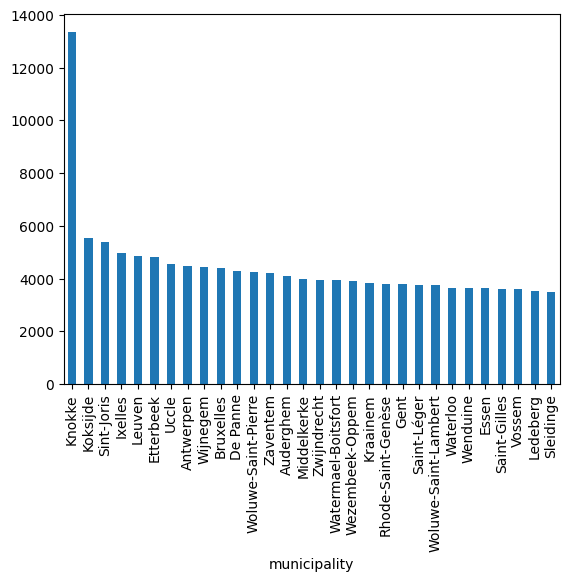

In [79]:
df['price_per_m2'] = df['price'] / df['living_area']

df_price_per_m2_per_municipality = df.groupby('municipality')['price_per_m2'].mean()

df_price_per_m2_per_municipality.nlargest(30).plot(kind= "bar")
plt.show()

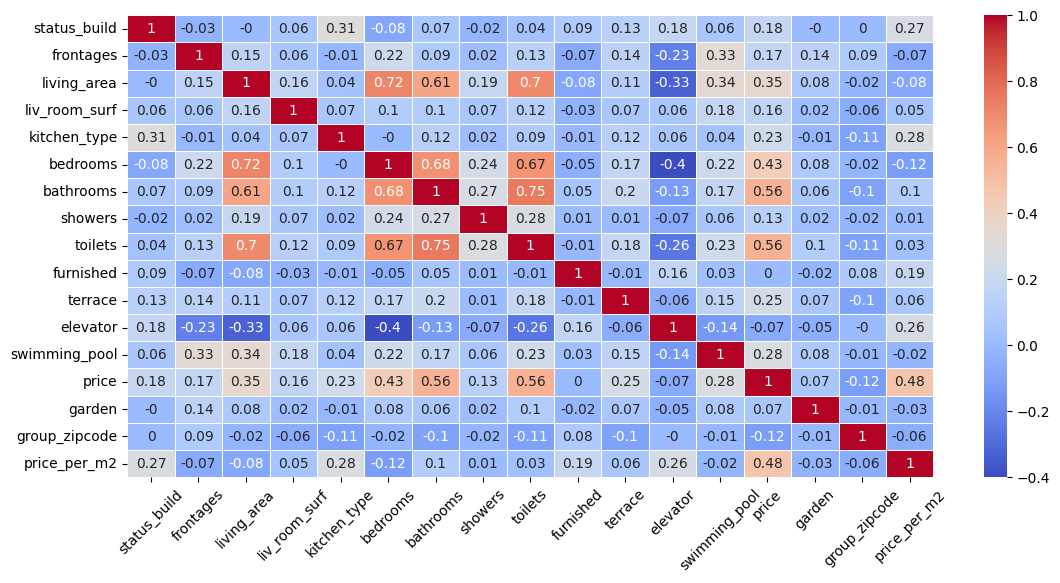

In [81]:
import seaborn as sns

correlation = df.drop(columns=['id', 'surroundings', 'energy_class', 'heating', 'flood_zone', 'zipcode', 'building_type', 'building_subtype', 'municipality', 'group_zipcode']) 
correlation_df = correlation.corr().round(2)


plt.figure(figsize=(13, 6))
sns.heatmap(correlation_df, vmax=1, annot=True, linewidths=.7, cmap="coolwarm")
plt.xticks(rotation=45)
plt.show()